## quest
- NSC_BND_M20 연속형 데이터 사용 
- 목표변수:SICK_SYM1, 설명변수 5개 사용
- DecisionTreeClassifier 전처리, 학습, 평가
- option : SICK_SYM1 항목은 8개만 선택

## 지도학습  

#### 분류 - 다항분류
- 목적변수의 범주가 2개 이상인것 

In [2]:
import pymongo as mg
import pandas as pd 

In [3]:
client = mg.MongoClient(host='mongodb://localhost:27017')
database = client['db_NHIS'] #Database 선택
collection = database['Join Collection NSC2_BND_M20'] # collection 선택
cursor = collection.find({})
list_M20 = list(cursor) # casting
df_M20 = pd.DataFrame(list_M20) 
df_M20[:2]

,_id,RN_INDI,BTH_YYYY,DTH_YYYYMM,COD1,COD2,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,...,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,64e6bbca5b6c745c7e44d61f,294364,1921LE,200707.0,T08-T14,W00-W19,2002080298703,26452,20020830,3,...,0,1,1,3,5.0,0.15,10590,3000,7590,2002
1,64e6bbca5b6c745c7e44d620,294364,1921LE,200707.0,T08-T14,W00-W19,2002090466395,63715,20020910,3,...,0,1,1,2,5.0,0.15,16520,4950,11570,2002


In [25]:
df_M20.to_csv('../../../datasets/Join Collection NSC2_BND_M20.csv') 

#### 전처리
- 목표변수 : 'SICK_SYM1'
- 설명변수 : 'OPRTN_YN','TOT_PRSC_DD_CNT','ED_RC_TOT_AMT', 'EDC_SBA', 'EDC_INSUR_BRDN_AMT'

In [5]:
df_M20.columns

Index(['_id', 'RN_INDI', 'BTH_YYYY', 'DTH_YYYYMM', 'COD1', 'COD2', 'RN_KEY',
       'RN_INST', 'MDCARE_STRT_DT', 'FORM_CD', 'MCARE_SUBJ_CD', 'SICK_SYM1',
       'OFIJ_TYPE', 'OPRTN_YN', 'MDCARE_DD_CNT', 'VSHSP_DD_CNT',
       'TOT_PRSC_DD_CNT', 'MCARE_RSLT_TYPE', 'EDC_ADD_RT', 'ED_RC_TOT_AMT',
       'EDC_SBA', 'EDC_INSUR_BRDN_AMT', 'STD_YYYY'],
      dtype='object')

In [6]:
df_M20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137163 entries, 0 to 137162
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _id                 137163 non-null  object 
 1   RN_INDI             137163 non-null  int64  
 2   BTH_YYYY            137163 non-null  object 
 3   DTH_YYYYMM          10269 non-null   float64
 4   COD1                8473 non-null    object 
 5   COD2                998 non-null     object 
 6   RN_KEY              137163 non-null  int64  
 7   RN_INST             137163 non-null  int64  
 8   MDCARE_STRT_DT      137163 non-null  int64  
 9   FORM_CD             137163 non-null  int64  
 10  MCARE_SUBJ_CD       137163 non-null  int64  
 11  SICK_SYM1           137163 non-null  object 
 12  OFIJ_TYPE           134428 non-null  object 
 13  OPRTN_YN            137163 non-null  int64  
 14  MDCARE_DD_CNT       137163 non-null  int64  
 15  VSHSP_DD_CNT        137163 non-nul

In [26]:
df_M20_extract = df_M20[['SICK_SYM1','OPRTN_YN','TOT_PRSC_DD_CNT','ED_RC_TOT_AMT', 'EDC_SBA', 'EDC_INSUR_BRDN_AMT']]
df_M20_extract.isnull().sum()

SICK_SYM1             0
OPRTN_YN              0
TOT_PRSC_DD_CNT       0
ED_RC_TOT_AMT         0
EDC_SBA               0
EDC_INSUR_BRDN_AMT    0
dtype: int64

In [32]:
# df_M20_extract['SICK_SYM1'].value_counts()
df_M20_extract['SICK_SYM1'].value_counts().iloc[:8]

J209    8244
I10     4629
I109    3275
F_      3203
N_      3177
J00     2247
J039    2067
J029    1980
Name: SICK_SYM1, dtype: int64

In [59]:
selected_values = df_M20_extract['SICK_SYM1'].value_counts().iloc[:8].index # 상위 8개만 뽑기

In [38]:
df_M20_extract = df_M20_extract[df_M20_extract['SICK_SYM1'].isin(selected_values)] 
df_M20_extract[:2]

,SICK_SYM1,OPRTN_YN,TOT_PRSC_DD_CNT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT
10,N_,0,0,10590,3000,7590
11,J00,0,3,12240,6120,6120


In [39]:
import re

In [40]:
# 알파벳을 숫자로 변환하는 함수 정의
def alphabet_to_number(s):
    result = ""
    for char in s:
        if re.match(r'[A-Za-z]', char):
            result += str(ord(char) - ord('A') + 1)
        else:
            result += char
    return result

In [43]:
# 'SICK_SYM1' 컬럼에 적용하여 알파벳을 숫자로 변환
df_M20_extract['SICK_SYM1_tonumber'] = df_M20_extract['SICK_SYM1'].apply(alphabet_to_number)
df_M20_extract['SICK_SYM1_tonumber']

10          14_
11         1000
16         1000
42        10209
55          14_
          ...  
137158    10209
137159    10209
137160    10209
137161    10209
137162     1000
Name: SICK_SYM1_tonumber, Length: 28822, dtype: object

In [46]:
# 숫자만 추출하는 함수 정의
def extract_numbers(s):
    numbers = re.findall(r'\d+', s)
    return ''.join(numbers)

In [48]:
# apply 함수를 사용하여 숫자만 추출하여 새로운 컬럼 생성
df_M20_extract['SICK_SYM1_numbers'] = df_M20_extract['SICK_SYM1_tonumber'].apply(extract_numbers)
df_M20_extract['SICK_SYM1_numbers']

10           14
11         1000
16         1000
42        10209
55           14
          ...  
137158    10209
137159    10209
137160    10209
137161    10209
137162     1000
Name: SICK_SYM1_numbers, Length: 28822, dtype: object

#### 정형화 

In [51]:
target_SICK = df_M20_extract['SICK_SYM1_numbers'] #목표변수 
features_SICK = df_M20_extract.drop(columns=['SICK_SYM1_tonumber','SICK_SYM1','SICK_SYM1_numbers']) #설명변수 
target_SICK.shape, features_SICK.shape

((28822,), (28822, 5))

#### 모델학습

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() #인스턴스화 
model.fit(features_SICK, target_SICK) #모델 훈련

DecisionTreeClassifier()

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [54]:
features_SICK.columns.to_list()

['OPRTN_YN',
 'TOT_PRSC_DD_CNT',
 'ED_RC_TOT_AMT',
 'EDC_SBA',
 'EDC_INSUR_BRDN_AMT']

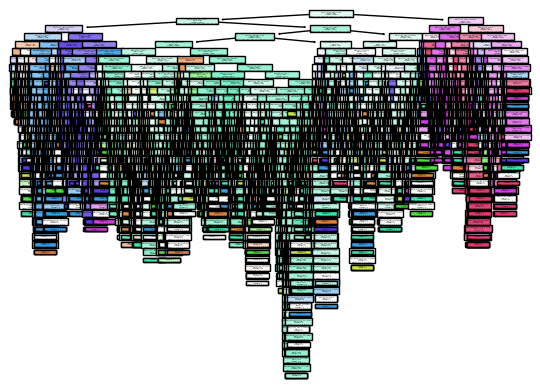

In [58]:
plot_tree(model, feature_names=features_SICK.columns.to_list(), filled=True) # filled=True
plt.show()

#### 평가

In [56]:
target_prdict = model.predict(features_SICK)  #설명변수를 통해 목저변수의 값을 예측
len(target_prdict)

28822

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(target_SICK, target_prdict) #실제값과 예측한 값을 비교를 통해 잘 예측했는지 평가

0.8523350218583027